In [ ]:
!gdown https://github.com/Jj64aA/PRODIGY_DS_04/raw/main/dataset/twitter_training.csv
!gdown https://github.com/Jj64aA/PRODIGY_DS_04/raw/main/dataset/twitter_validation.csv

Downloading...
From: https://github.com/Jj64aA/PRODIGY_DS_04/raw/main/dataset/twitter_training.csv
To: /content/twitter_training.csv
10.3MB [00:00, 27.0MB/s]
Downloading...
From: https://github.com/Jj64aA/PRODIGY_DS_04/raw/main/dataset/twitter_validation.csv
To: /content/twitter_validation.csv
163kB [00:00, 17.9MB/s]        


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df  = pd.read_csv("twitter_training.csv", header=None)
df_test   = pd.read_csv("twitter_validation.csv", header=None)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df = df.fillna('')
df_test = df_test.fillna('')

new_df = pd.DataFrame()
new_df[['Sentiment', 'Text']] = df.iloc[:, -2:]

new_df_test = pd.DataFrame()
new_df_test[['Sentiment', 'Text']] = df_test.iloc[:, -2:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = TfidfVectorizer()
clf = SVC(kernel='rbf')

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', clf)
])

X_train = new_df['Text']
y_train = new_df['Sentiment']

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', SVC())])

In [ ]:
X_test = new_df_test['Text']
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_test = new_df_test['Sentiment']
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100} %")

Accuracy: 98.5 %


<Figure size 800x600 with 0 Axes>

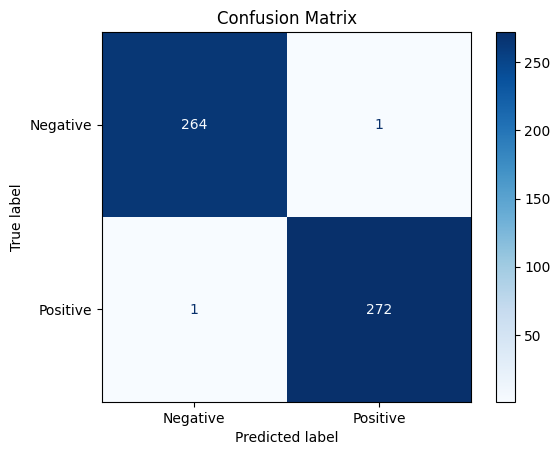

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_examples = [
    "This product is fantastic!",
    "I am not satisfied with the service.",
    "The quality is okay, but could be improved.",
    "Absolutely loved it, will buy again!"
]
predictions = pipeline.predict(new_examples)
for example, prediction in zip(new_examples, predictions):
    print(f"Example: {example}")
    print(f"Prediction: {prediction}")
    print()

Example: This product is fantastic!
Prediction: Positive

Example: I am not satisfied with the service.
Prediction: Negative

Example: The quality is okay, but could be improved.
Prediction: Neutral

Example: Absolutely loved it, will buy again!
Prediction: Positive



In [ ]:
my_tweets = [
   "Thanks @Fcmam5 for the great documents, really will help all and especially those who want to join this area. I had a lot of fun reading these documents and I wish you success in developing these documents and collecting more data",
   "On this great day, July 5th, we celebrate the 62nd anniversary of Algeria's independence" ,
   "Try out the new LoginRequiredMiddleware, Postgres connection pools, and a kaleidoscope of other improvements"

]
predictions = pipeline.predict(my_tweets)
for example, prediction in zip(my_tweets, predictions):
    print(f"Tweet : {example}")
    print(f"Prediction: {prediction}")
    print()

Tweet : Thanks @Fcmam5 for the great documents, really will help all and especially those who want to join this area. I had a lot of fun reading these documents and I wish you success in developing these documents and collecting more data
Prediction: Positive

Tweet : On this great day, July 5th, we celebrate the 62nd anniversary of Algeria's independence
Prediction: Irrelevant

Tweet : Try out the new LoginRequiredMiddleware, Postgres connection pools, and a kaleidoscope of other improvements
Prediction: Positive

